In [41]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import pyvista as pv
from itertools import combinations

In [42]:
df = pd.read_csv('GSM1173493_cell-1.txt', sep='\t')

In [99]:
df.head(100)

,chrom1,coord1,chrom2,coord2
0,1,3023035,1,14942225
1,1,3065457,1,19796342
2,1,3312156,1,5315667
3,1,3377904,1,24338979
4,1,3390558,1,20722058
...,...,...,...,...
95,1,9006210,1,45956951
96,1,9207717,1,45412186
97,1,9269465,1,9634562
98,1,9278759,1,45327270


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30665 entries, 0 to 30664
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   chrom1  30665 non-null  object
 1   coord1  30665 non-null  int64 
 2   chrom2  30665 non-null  object
 3   coord2  30665 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 958.4+ KB


In [45]:
def generate_sc_hic_contact_matrix(data, chromosome, bin_size=1000000, kernel_initializer = None):

    chromosome_data = data[(data['chrom1'] == chromosome) & (data['chrom2'] == chromosome)]
    
    coords = np.concatenate([chromosome_data['coord1'].values, chromosome_data['coord2'].values])
    min_coord = min(coords)
    max_coord = max(coords)
    
    num_bins = int((max_coord - min_coord) / bin_size) + 1
    
    contact_matrix = np.zeros((num_bins, num_bins), dtype=int)
    
    for _, row in chromosome_data.iterrows():
        coord1 = row['coord1']
        coord2 = row['coord2']
        bin_index1 = (coord1 - min_coord) // bin_size
        bin_index2 = (coord2 - min_coord) // bin_size
        contact_matrix[bin_index1, bin_index2] += 1
        contact_matrix[bin_index2, bin_index1] += 1
    
    plt.figure(figsize=(8, 6))
    plt.imshow(contact_matrix, cmap='Reds', interpolation='nearest')
    plt.colorbar()
    plt.title('scHi-C Contact Matrix for chromosome number {}'.format(chromosome))
    plt.xlabel('Genomic Bins')
    plt.ylabel('Genomic Bins')

    plt.show()



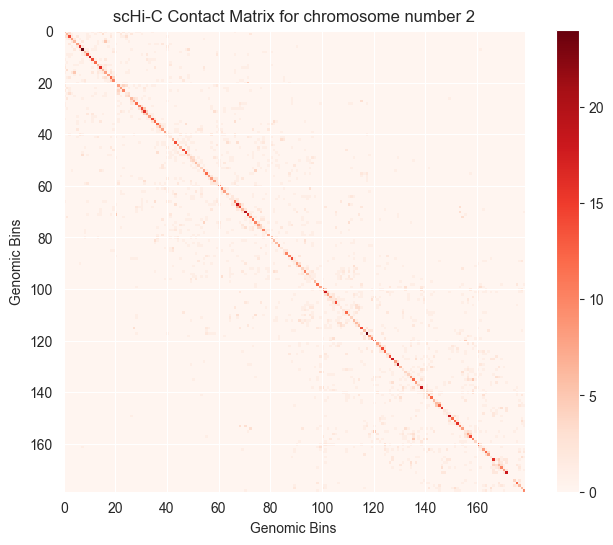

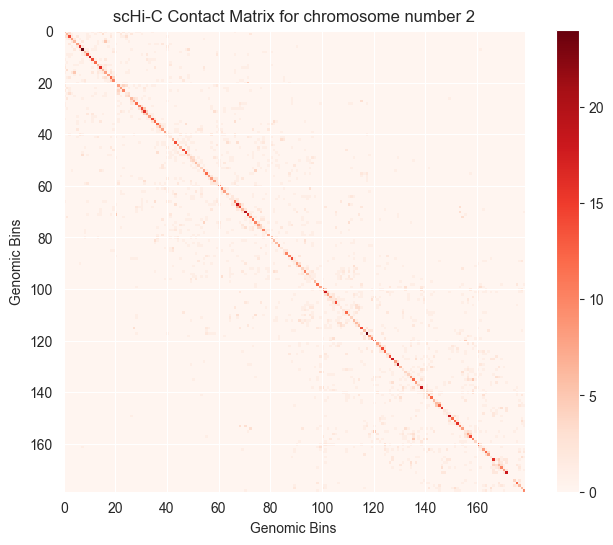

In [46]:
generate_sc_hic_contact_matrix(df, "2")

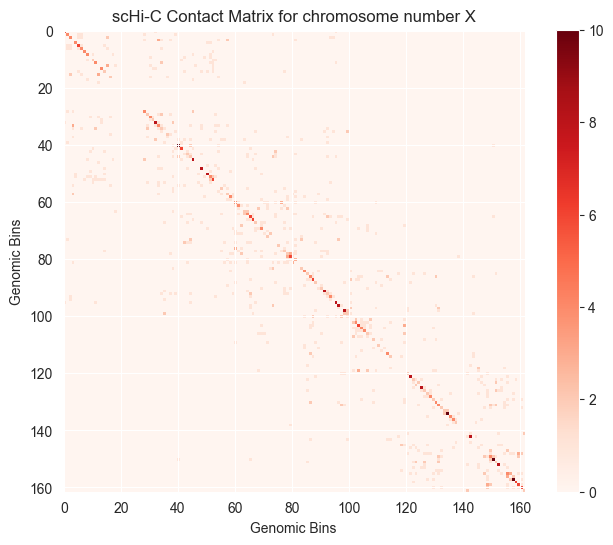

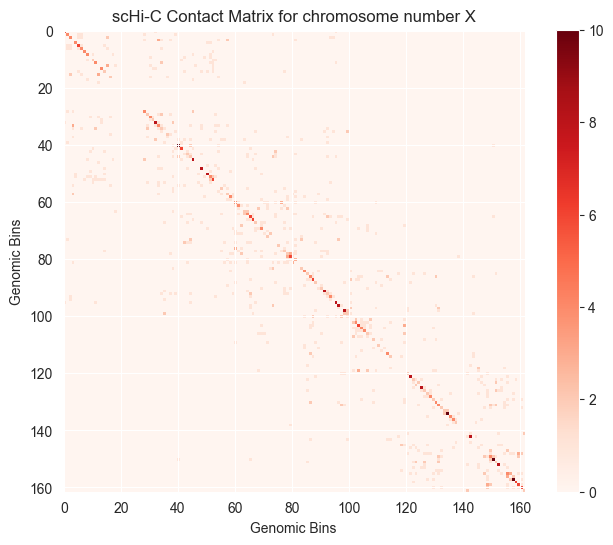

In [100]:
generate_sc_hic_contact_matrix(df, 'X')

In [ ]:
def generate_sc_hic_contact_matrix1(data, chromosome, bin_size=1000000, kernel_initializer = None):

    chromosome_data = data[(data['chrom1'] == chromosome) & (data['chrom2'] == chromosome)]

    coords = np.concatenate([chromosome_data['coord1'].values, chromosome_data['coord2'].values])
    min_coord = min(coords)
    max_coord = max(coords)

    num_bins = int((max_coord - min_coord) / bin_size) + 1

    contact_matrix = np.zeros((num_bins, num_bins), dtype=int)

    for _, row in chromosome_data.iterrows():
        coord1 = row['coord1']
        coord2 = row['coord2']
        bin_index1 = (coord1 - min_coord) // bin_size
        bin_index2 = (coord2 - min_coord) // bin_size
        contact_matrix[bin_index1, bin_index2] += 1
        contact_matrix[bin_index2, bin_index1] += 1
    return contact_matrix

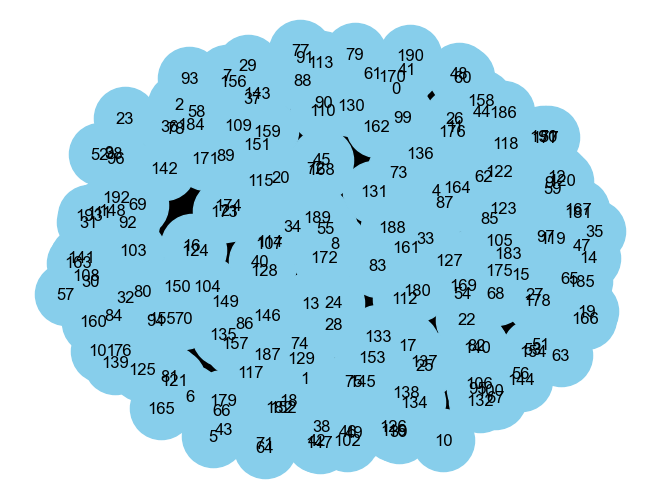

In [110]:
def generate_3d_tetrahedral_graph(contact_matrix):

    G = nx.Graph()

    num_bins = contact_matrix.shape[0]

    for i in range(num_bins):
        G.add_node(i)

    for i in range(num_bins):
        for j in range(i+1, num_bins):
            weight = contact_matrix[i, j]
            if weight > 0:
                G.add_edge(i, j, weight=weight)

    for tetra_edges in combinations(range(num_bins), 4):
        G.add_edges_from(combinations(tetra_edges, 2))

    return G


adjacency_matrix = generate_sc_hic_contact_matrix1(df, '1')

tetrahedral_graph = generate_3d_tetrahedral_graph(adjacency_matrix)

pos = nx.spring_layout(tetrahedral_graph)
nx.draw(tetrahedral_graph, pos, with_labels=True, node_color='skyblue', node_size=2000)
plt.show()
